In [9]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [12]:
df.head()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
X=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [19]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [20]:
df.shape

(768, 9)

In [21]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [22]:
torch.manual_seed(20)
model=ANN_Model()

In [23]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [31]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [42]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss.detach().numpy())
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 0.24693059921264648
Epoch number: 11 and the loss : 0.2518436312675476
Epoch number: 21 and the loss : 0.2592151165008545
Epoch number: 31 and the loss : 0.2809295356273651
Epoch number: 41 and the loss : 0.25911420583724976
Epoch number: 51 and the loss : 0.260562002658844
Epoch number: 61 and the loss : 0.2497154325246811
Epoch number: 71 and the loss : 0.24309970438480377
Epoch number: 81 and the loss : 0.2406928390264511
Epoch number: 91 and the loss : 0.2409398853778839
Epoch number: 101 and the loss : 0.23899096250534058
Epoch number: 111 and the loss : 0.2395126074552536
Epoch number: 121 and the loss : 0.23888647556304932
Epoch number: 131 and the loss : 0.2402341067790985
Epoch number: 141 and the loss : 0.23548352718353271
Epoch number: 151 and the loss : 0.26499462127685547
Epoch number: 161 and the loss : 0.2632417380809784
Epoch number: 171 and the loss : 0.23239153623580933
Epoch number: 181 and the loss : 0.2323831021785736
Epoch number: 19

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

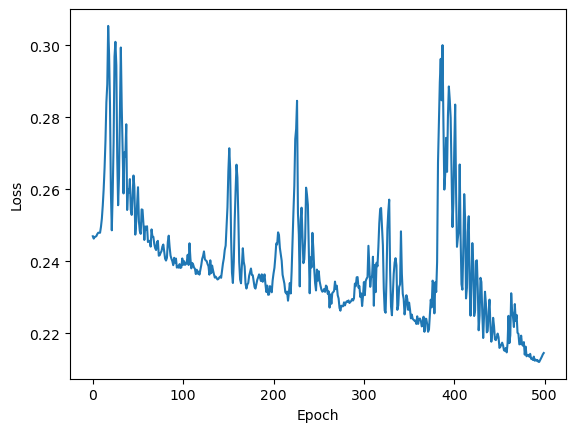

In [45]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [46]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
0
0
0
1
1
0
1
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
1
0
1
0
0
1
0
1
1
0
1
1
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
1
0
1
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[90, 17],
       [25, 22]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted Values')

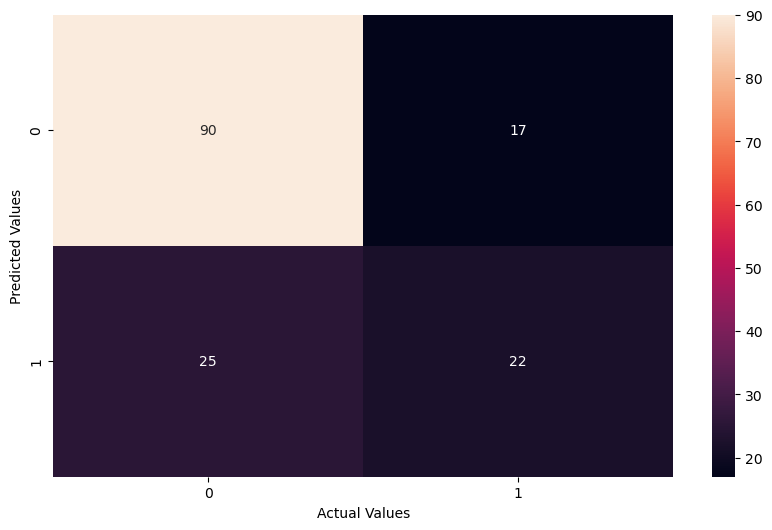

In [49]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [50]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7272727272727273

In [51]:
torch.save(model,'diabetes.pt')

In [52]:
model=torch.load('diabetes.pt')

In [53]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [54]:
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [55]:
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [56]:
new_data=torch.tensor(lst1)

In [57]:
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.8931, 2.1371])
1
